# 折线图、柱状图、箱图

欢迎大家回到 Machine Learning Diary👏


今天要做的事情

1. 理解数据 - titanic
2. 理解数据的基础上，玩数据


## 一、Titanic练习赛介绍

Titanic练习赛主要就是预测乘客是否存活，训练集中有乘客的若干特征与存活情况，乘客特征是年龄，性别等信息。使用训练集训练出一个模型，然后利用该模型去预测测试集中乘客的存活情况。

## 二、特征分析与选择

训练集中乘客的特征有：PassengerId，Pclass，Name，Sex，Age，SibSp，Parch，Ticket，Fare，Cabin和Embarked。

接下来我们就对几个特征（变量）进行数据分析和可视化分析。

一般会在一开始把要用到的package都import进来。如果运行下面这个框时遇到 ImportError: No module named 'xxx'，就去pip install下来，如果忘了怎么下载package，课程链接：[魔法口令 - “pip install xxx”](https://github.com/YZHANG1270/Girls-In-AI/blob/master/machine_learning_diary/package/import.md)

In [174]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

下面的代码框里首先用pandas把数据读进来，这节课我们先来分析train.csv这个数据文件。以及，pd.read_csv("D:/kaggle/titanic/data/train.csv")里面的路径记得换成你自己的，ok？

In [155]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("D:/kaggle/titanic/data/train.csv")

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
# 观察数据 和 数据类型
titanic_df.info()
# print("----------------------------")
# test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


尝试删除几个你觉得没有用的变量，比如 ['PassengerId','Name','Ticket']，使用df.drop()就可以。删除之后可以用titanic_df.info()再检查是否已删除这些字段。

In [157]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
# test_df    = test_df.drop(['Name','Ticket'], axis=1)

In [158]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


## Embarked

接下来研究下Embarked这个变量数据，Port of Embarkation，登船城市，C Q S 分别代表不同的城市。

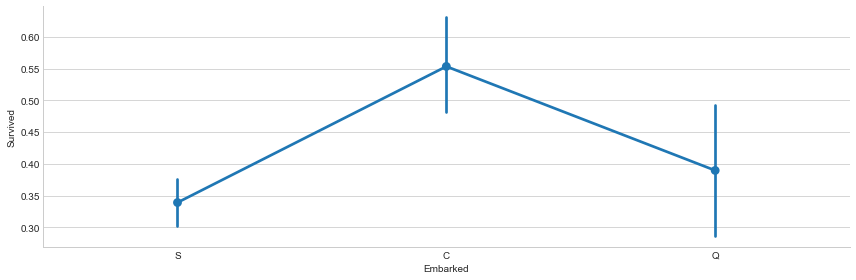

In [159]:
# Embarked

# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
# 将缺失值用出现频率最高的 S 代替
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

# plot
# 画出存活率和Embarked之间的折线图，统计频率
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)

接下来画一个有3个子图的柱状图：
1. 将Embarked统计频次
2. 按照是否survived将3种Embarked统计频次
3. 在survived里统计三种Embarked的频率

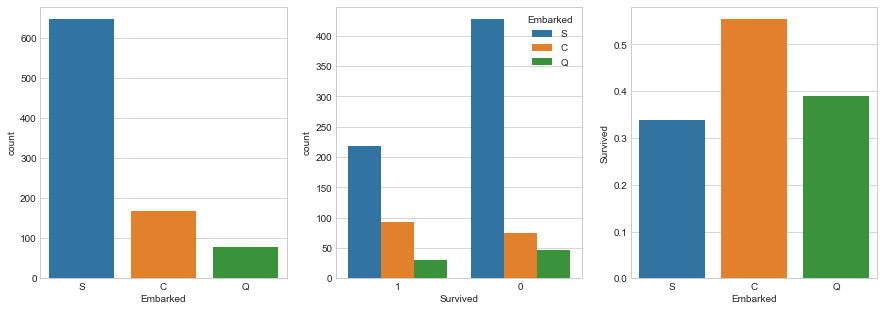

In [160]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))


# 1. 将Embarked统计频次
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)

# 2. 按照是否survived将3种Embarked统计频次
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# 3. 在survived里统计三种Embarked的频率
# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()

sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

# Fare

接下来研究下 Fare 这个变量数据。

In [161]:
# convert from float to int
# 画图的过程中要注意各种数据类型是否为数字本身
titanic_df['Fare'] = titanic_df['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

画Fare相关的柱状图：

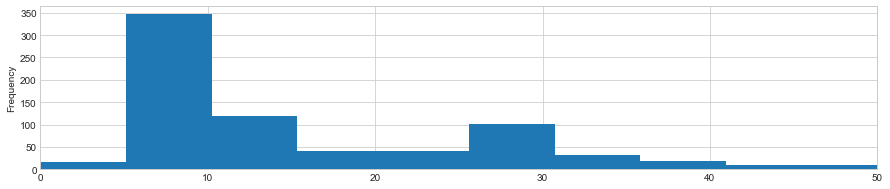

In [162]:
# plot
# 1 画出Fare的频次统计
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

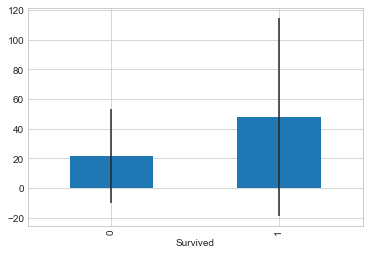

In [163]:
# 2 画出根据是否survived的Fare的箱图
avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

# Age

接下来研究下 Age 这个变量数据。首先画一个年纪的分布图，再对年龄做数据处理，重新画图。

C:\Users\Yi\Anaconda3\envs\python35\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


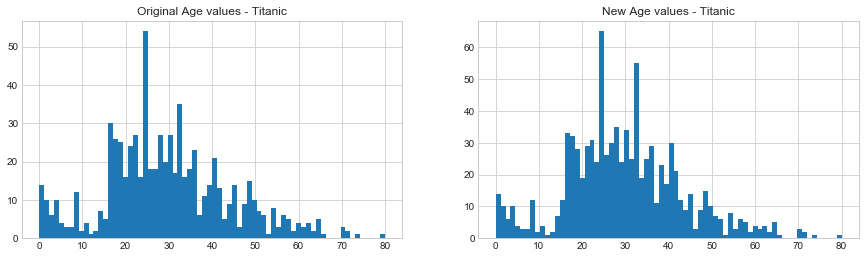

In [164]:
# 首先确定有连个子图
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# 图1 的 title
axis1.set_title('Original Age values - Titanic')
# 图2 的 title
axis2.set_title('New Age values - Titanic')

# 用原始年龄数据画图
# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# 对年龄进行数据处理
# fill NaN values in Age column with random values generated
# 用随机数据填充确实年龄信息
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1

# convert from float to int
# 对数据进行 整数处理
titanic_df['Age'] = titanic_df['Age'].astype(int)
        
# plot new Age Values
# 画新图
titanic_df['Age'].hist(bins=70, ax=axis2)

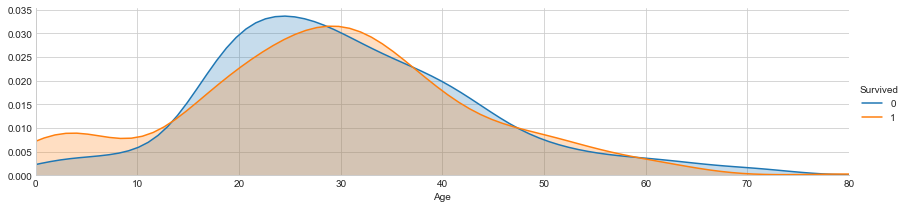

In [165]:
# .... continue with plot Age column

# 继续画一张曲线图，按照survived分开画
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

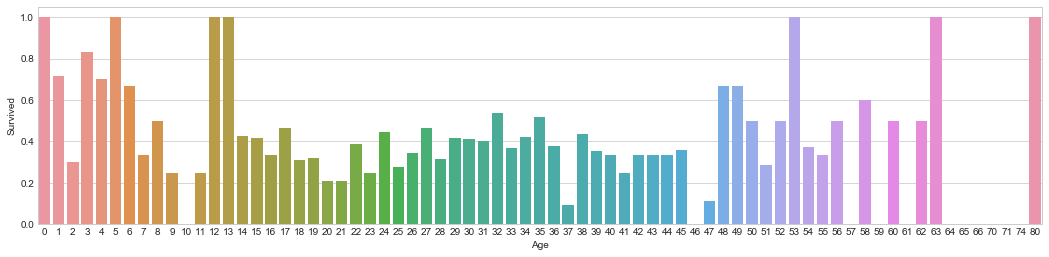

In [166]:
# 根据年龄统计存活的平均人数
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

# Cabin

接下来研究下 Cabin 这个变量数据，但是缺失值太多，不好做展示，这次不做仔细分析。直接删去。

In [167]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_df.drop("Cabin",axis=1,inplace=True)

# Family

接下来研究下 Family 这个变量数据，看看存活率跟是否一家出行有多大的关系。这个Family的变量是根据Parch & SibSp这两个变量统计出来的。如果Parch & SibSp不为0，代表乘客是和家里人一起出行的。

In [168]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

C:\Users\Yi\Anaconda3\envs\python35\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[Text(0,0,'With Family'), Text(0,0,'Alone')]

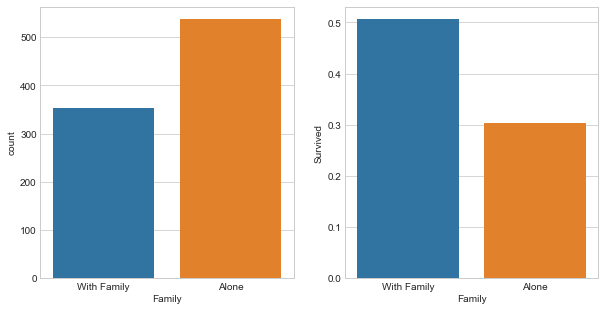

In [169]:
# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

# Sex

接下来研究下 Sex 这个变量数据，看看存活率跟性别有多大的关系。首先按照是否满16岁，将人群分为是否为"成人"，再分男人和女人。

In [170]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)

In [171]:
# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

画两张图：
1. 按性别、成人统计人数
2. 按性别和成人与否统计存活率

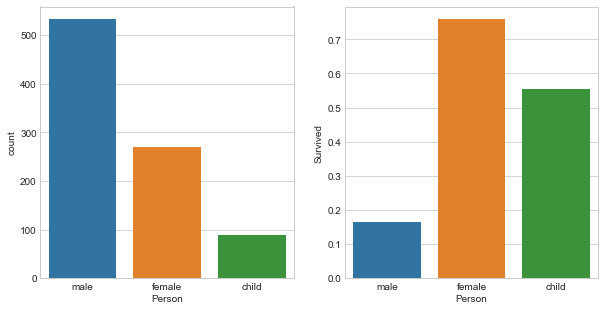

In [172]:
titanic_df = titanic_df.join(person_dummies_titanic)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=titanic_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

# Pclass

接下来研究下 Pclass 这个变量数据，画个存活率的统计概率：

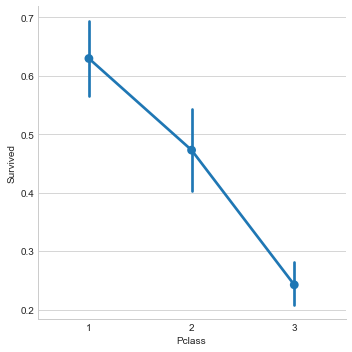

In [173]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=5)

OK, 现在有没有对数据的可视化稍微有点感觉啦？ 下次我们还会分析更多有趣的数据。

👩好啦，今天的课程就到这里啦！咱们下次见！~